# Fit Fragments (BRD4)

In [1]:
%load_ext autoreload
%autoreload 2

### Libraries

In [2]:
import sys

sys.path.append("..")

In [3]:
import open3d as o3d
import numpy as np
import seaborn as sns
import pandas as pd

from numpy.random import default_rng

import re, os
from io import StringIO

from tqdm.auto import trange

import py3Dmol

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools

import ipywidgets as widgets

import copy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


INFO - 2021-08-20 13:17:31,654 - __init__ - Enabling RDKit 2021.03.3 jupyter extensions


In [4]:
from utils import show_two_mols
from utils import AlignShow, translate_and_rotate, cut_mol_on_single_bonds

## SENSAAS

### Imatinib (Test)

In [5]:
%%bash
export PATH=${PWD}/../../sensaas:${PATH}
python ../../sensaas/meta-sensaas.py ligands/imatinib.sdf ligands/imatinib_parts.sdf

[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WA

In [6]:
imatinibfrags = [mol for mol in Chem.SDMolSupplier("catsensaas.sdf")]
imatinib = next(Chem.SDMolSupplier("ligands/imatinib.sdf"))


_ = widgets.interact(
    lambda index: show_two_mols(imatinib, imatinibfrags[index]),
    index=widgets.IntSlider(min=0, max=len(imatinibfrags) - 1, step=1, value=0),
)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## BRD4 Inhibitors

In [7]:
path = "ligands/BRD4"
files = [
    os.path.join(path, f)
    for f in os.listdir(path)
    if os.path.splitext(f)[-1] == ".pcd" and os.path.splitext(f)[0][-4:] == "tran"
]

# Sort BRD4 ligand files by number
r = re.compile("\d{1,2}")
files.sort(key=lambda f: int(r.search(os.path.basename(f)).group()))

print(files)

pcds = []
mols = []
for f in files:
    pcd = o3d.io.read_point_cloud(f)
    pcds.append(pcd)

    s = Chem.SDMolSupplier(f.replace(".pcd", ".sdf"))
    mol = next(s)
    mols.append(mol)

['ligands/BRD4/ligand-1_tran.pcd', 'ligands/BRD4/ligand-2_tran.pcd', 'ligands/BRD4/ligand-3_tran.pcd', 'ligands/BRD4/ligand-4_tran.pcd', 'ligands/BRD4/ligand-5_tran.pcd', 'ligands/BRD4/ligand-6_tran.pcd', 'ligands/BRD4/ligand-7_tran.pcd', 'ligands/BRD4/ligand-8_tran.pcd', 'ligands/BRD4/ligand-9_tran.pcd', 'ligands/BRD4/ligand-10_tran.pcd']


### Generate Fragments Manually from Single Bonds

In [8]:
molid = 8

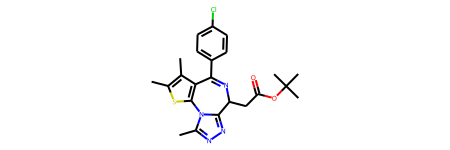

In [9]:
refmol = copy.deepcopy(mols[molid])

# Visualization
mol2D = copy.deepcopy(refmol)
mol2D.Compute2DCoords()
mol2D

In [10]:
# Cut fragments from original molecule (in 3D), not mol1 (in 2D)
frags = cut_mol_on_single_bonds(refmol)

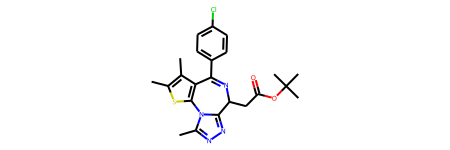

In [11]:
df = pd.DataFrame(frags, columns=["frag1", "frag2"])
df["frag1_smiles"] = df["frag1"].apply(Chem.MolToSmiles)
df["frag2_smiles"] = df["frag2"].apply(Chem.MolToSmiles)

PandasTools.AddMoleculeColumnToFrame(df, "frag1_smiles", "frag1_2D")
PandasTools.AddMoleculeColumnToFrame(df, "frag2_smiles", "frag2_2D")

# Show reference before printing out dataframe
mol2D

,frag1,frag2,frag1_2D,frag2_2D
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,

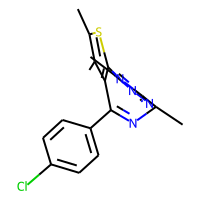
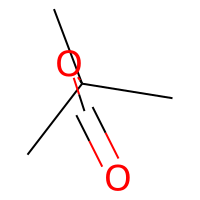
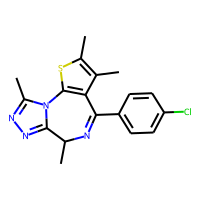
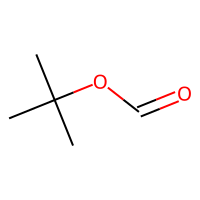
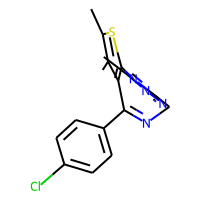
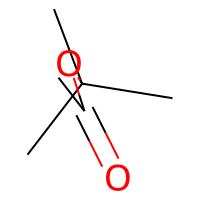
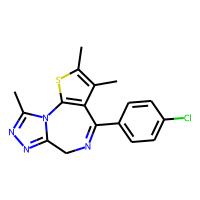
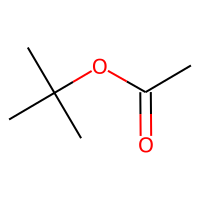
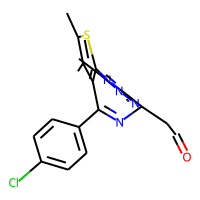
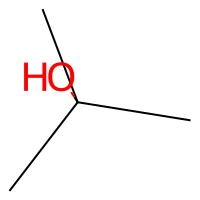
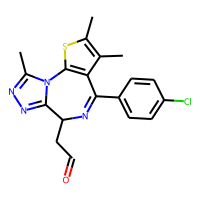
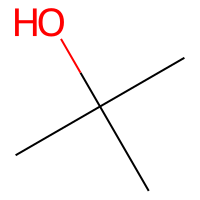
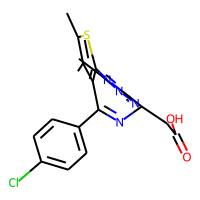
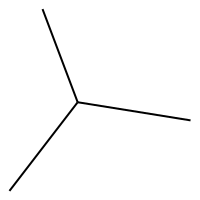
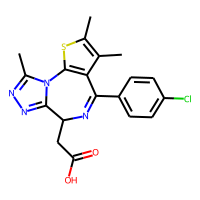
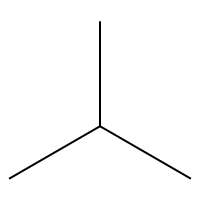
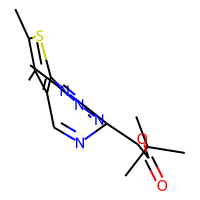
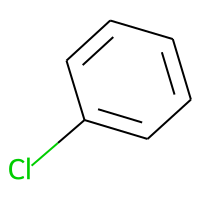
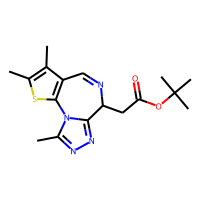
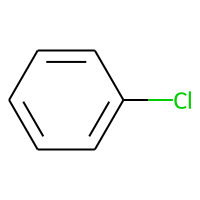

In [12]:
# Check df is still 3D
df.drop(columns=["frag1_smiles", "frag2_smiles"])

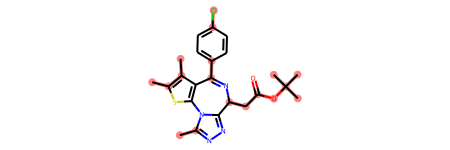

In [13]:
# Check mol1 is 3D
mol2D = copy.deepcopy(refmol)
mol2D.Compute2DCoords()
mol2D

Check that the `translate_and_rotate` function works as expected (with benzene as example):

In [14]:
testmol = Chem.MolFromSmiles("c1ccccc1")
testmolh = Chem.AddHs(testmol)
AllChem.EmbedMolecule(testmolh)

0

In [15]:
def show(index):
    p = py3Dmol.view()
    p.addModel(Chem.MolToMolBlock(testmolh), "sdf")
    translate_and_rotate(testmolh)
    p.addModel(Chem.MolToMolBlock(testmolh), "sdf")

    p.setStyle({"model": 0}, {"stick": {"colorscheme": "lightgreyCarbon"}})
    p.setStyle({"model": 1}, {"stick": {"colorscheme": "redCarbon"}})

    p.zoomTo()

    return p


_ = widgets.interact(show, index=widgets.IntSlider(min=0, max=100, step=1, value=0))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Create randomly rotated and translate fragments from the cuts performed above:

In [16]:
for idx, row in df.iterrows():
    mol1 = row["frag1"]
    mol2 = row["frag2"]

    # Randomly translate and rotate fragments
    translate_and_rotate(mol1)
    translate_and_rotate(mol2)

    with Chem.SDWriter(os.path.join(path, f"frag_{idx}_1.sdf")) as w:
        w.write(mol1, confId=0)

    with Chem.SDWriter(os.path.join(path, f"frag_{idx}_2.sdf")) as w:
        w.write(mol2, confId=0)

In [17]:
n_frags = len(frags)
n_frags_minus_one = n_frags - 1
n_frags

5

In [18]:
!ls ligands/BRD4 | grep frag

allfrags.sdf
frag_0_1.pcd
frag_0_1.sdf
frag_0_2.pcd
frag_0_2.sdf
frag_1_1.pcd
frag_1_1.sdf
frag_1_2.pcd
frag_1_2.sdf
frag_2_1.pcd
frag_2_1.sdf
frag_2_2.pcd
frag_2_2.sdf
frag_3_1.pcd
frag_3_1.sdf
frag_3_2.pcd
frag_3_2.sdf
frag_4_1.pcd
frag_4_1.sdf
frag_4_2.pcd
frag_4_2.sdf


## Fragment Alignment with SENSAAS

Concatenate all fragment SDF files to be aligned to the original file using `meta-sensaas.py`:

In [19]:
%%bash
cat ligands/BRD4/frag_?_?.sdf > ligands/BRD4/allfrags.sdf

In [20]:
reffile = files[molid].replace(".pcd", ".sdf")
reffile

'ligands/BRD4/ligand-9_tran.sdf'

In [21]:
%%bash  -s {reffile}
export PATH=${PWD}/../../sensaas:${PATH}
python ../../sensaas/meta-sensaas.py ${1} ligands/BRD4/allfrags.sdf 

[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.
[Open3D WA

Traceback (most recent call last):
  File "../../sensaas/sensaas.py", line 235, in <module>
    tran=gcicp_registration(source_pcd,target_pcd,threshold,output,pcds2,pcds3,pcds4,pcdt2,pcdt3,pcdt4,Slabel2,Slabel3,Slabel4, args.voxel_sizes)
  File "/biggin/b195/lina3015/Documents/git/sensaas/GCICP.py", line 75, in gcicp_registration
    result_cicp = colored_point_cloud(source_down,target_down,globaltran,voxel_size)
  File "/biggin/b195/lina3015/Documents/git/sensaas/GCICP.py", line 48, in colored_point_cloud
    relative_rmse = 1e-6, max_iteration = max_iter))
RuntimeError: [Open3D Error] (virtual Eigen::Matrix4d open3d::pipelines::registration::TransformationEstimationForColoredICP::ComputeTransformation(const open3d::geometry::PointCloud&, const open3d::geometry::PointCloud&, const CorrespondenceSet&) const) /home/runner/work/Open3D/Open3D/cpp/open3d/pipelines/registration/ColoredICP.cpp:124: No correspondences found between source and target pointcloud.



In [22]:
sensaasfrags = [mol for mol in Chem.SDMolSupplier("catsensaas.sdf")]


def update(index=0):
    p = py3Dmol.view()

    m = sensaasfrags[index]
    if m is not None:
        p.addModel(Chem.MolToMolBlock(m), "sdf")
        p.addModel(Chem.MolToMolBlock(refmol), "sdf")

    p.setStyle({"model": 1}, {"stick": {"colorscheme": "lightgreyCarbon"}})
    p.setStyle({"model": 0}, {"stick": {"colorscheme": "redCarbon"}})

    p.zoomTo()

    return p


_ = widgets.interact(
    update, index=widgets.IntSlider(min=0, max=len(sensaasfrags) - 1, step=1, value=0)
)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Fragment Alignment with `libmolgrid` Densities

In [23]:
%%bash -s "$path" "$n_frags_minus_one"

# Python variable path passed to bash
# Can be accessed with $1

# Python variable n_frags passed to bash
# Can be accessed with $2

# Unfortunately molgrid does not work well with pybel
# molgrid_to_pcd needs to run within a Singularity container
# (RDKit and molgrid compiled from source!)
# See https://github.com/gnina/libmolgrid/issues/62

for FRAG in $(seq 0 $2)
do
    singularity run --nv --app python ../development/densitymatch.sif \
        ../molgrid_to_pcd.py ${PWD}/${1}/frag_${FRAG}_1.sdf -o ${PWD}/${1}/frag_${FRAG}_1.pcd \
            --ligmap ${PWD}/../files/ligmap

    singularity run --nv --app python ../development/densitymatch.sif \
        ../molgrid_to_pcd.py ${PWD}/${1}/frag_${FRAG}_2.sdf -o ${PWD}/${1}/frag_${FRAG}_2.pcd \
            --ligmap ${PWD}/../files/ligmap
done

In [24]:
!ls ligands/BRD4 | grep "frag.*\.pcd"

frag_0_1.pcd
frag_0_2.pcd
frag_1_1.pcd
frag_1_2.pcd
frag_2_1.pcd
frag_2_2.pcd
frag_3_1.pcd
frag_3_2.pcd
frag_4_1.pcd
frag_4_2.pcd


In [25]:
fpcds = []
fmols = []

files = [
    os.path.join(path, f"frag_{nf}_{i}.pcd")
    for nf in range(n_frags)
    for i in range(1, 3)
]

print(files)

for f in files:
    pcd = o3d.io.read_point_cloud(f)
    fpcds.append(pcd)

    s = Chem.SDMolSupplier(f.replace(".pcd", ".sdf"))
    mol = next(s)
    fmols.append(mol)

print(fpcds)

['ligands/BRD4/frag_0_1.pcd', 'ligands/BRD4/frag_0_2.pcd', 'ligands/BRD4/frag_1_1.pcd', 'ligands/BRD4/frag_1_2.pcd', 'ligands/BRD4/frag_2_1.pcd', 'ligands/BRD4/frag_2_2.pcd', 'ligands/BRD4/frag_3_1.pcd', 'ligands/BRD4/frag_3_2.pcd', 'ligands/BRD4/frag_4_1.pcd', 'ligands/BRD4/frag_4_2.pcd']
[PointCloud with 868 points., PointCloud with 277 points., PointCloud with 845 points., PointCloud with 320 points., PointCloud with 938 points., PointCloud with 196 points., PointCloud with 971 points., PointCloud with 114 points., PointCloud with 921 points., PointCloud with 206 points.]


In [26]:
# Add reference molecule to fragments
allmols = [mols[molid]] + fmols
allpcds = [pcds[molid]] + fpcds

In [27]:
als = AlignShow(allmols, allpcds)

In [28]:
als.show(0, 1)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [29]:
_ = widgets.interact(
    lambda index: als.show(0, index),
    index=widgets.IntSlider(min=0, max=len(fmols) - 1, step=1, value=1),
)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol